In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
#Load both input values and output values
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

In [3]:
#Check the details in these files
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [4]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [5]:
#Convert the files into images
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

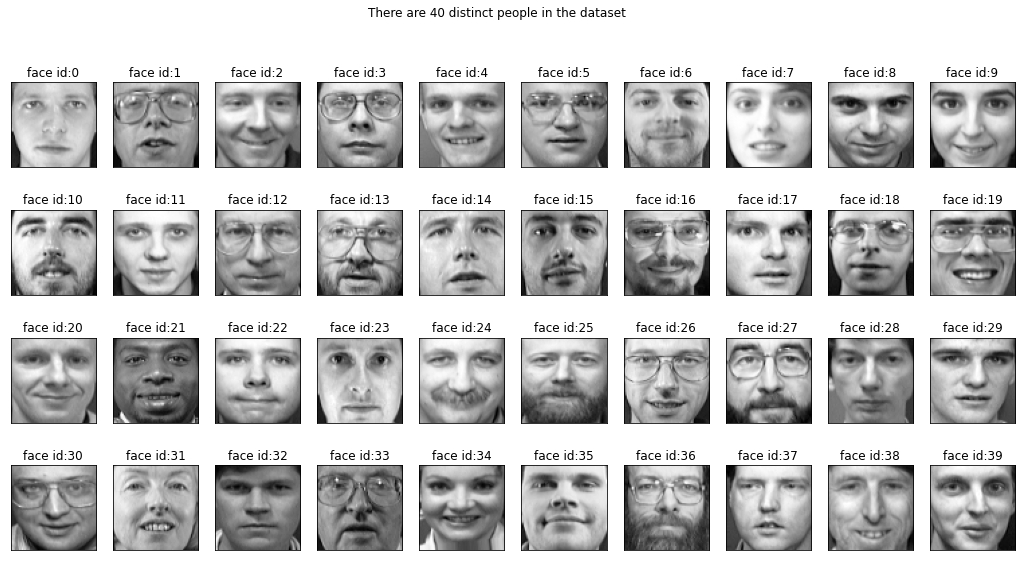

In [6]:
show_40_distinct_people(data, np.unique(target))

In [7]:
#Show 10 Face Images of Selected Target as an illustration

def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

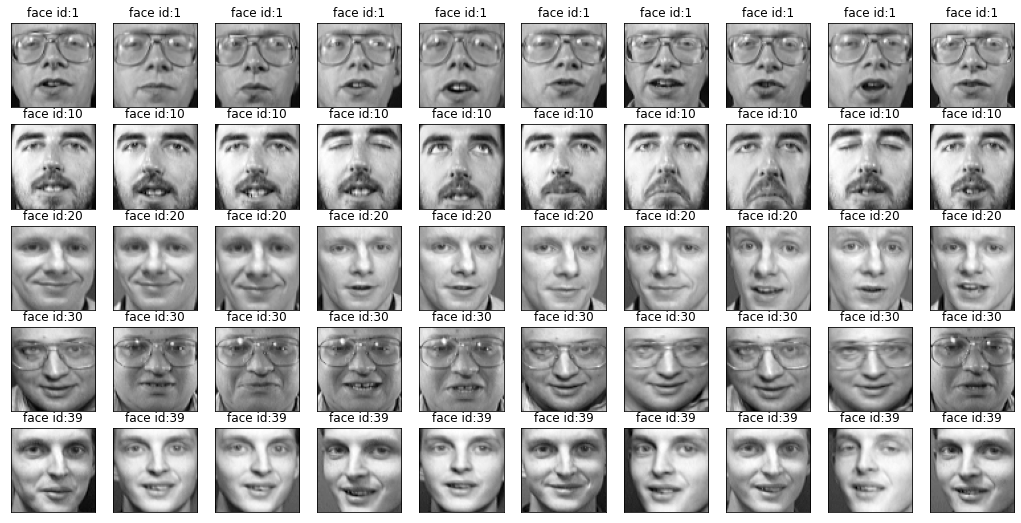

In [8]:
#See some select people's available different faces. can look for others too
show_10_faces_of_n_subject(images=data, subject_ids=[1,10, 20, 30, 39])

In [9]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)
data.shape

X shape: (400, 4096)


(400, 64, 64)

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

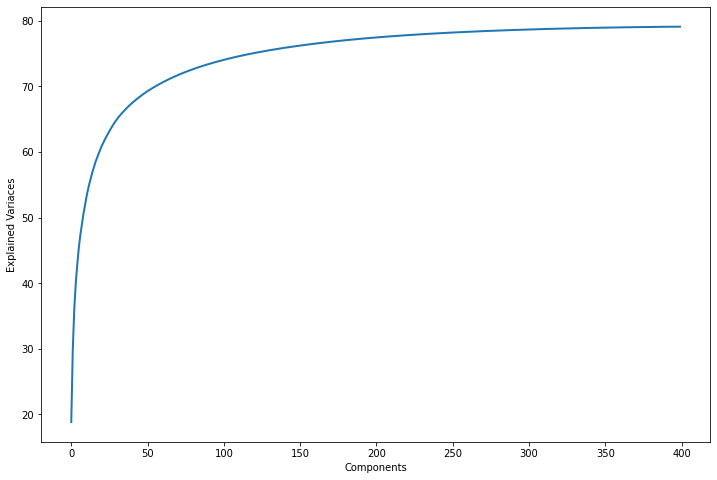

In [12]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_.cumsum(), linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In the figure above, it can be seen that 80 and more PCA components represent the same data. Now let's make the classification process using 80 PCA components.

In [13]:
n_components=80

In [14]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=80, whiten=True)

In [15]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [16]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.92


In [17]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00    

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,GridSearchCV
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
clf = SVC()
kfold=KFold(n_splits=5, shuffle=True, random_state=0) 
cv_scores=cross_val_score(clf, X_pca, target, cv=kfold)
print("{} mean cross validations score:{:.2f}".format(clf, cv_scores.mean()))

from sklearn.model_selection import LeaveOneOut

#This process takes long time. You can use parameter:{'C': 1.0, 'penalty': 'l2'} 
#grid search cross validation score:0.93

params={'C':[1,10,100],
      'gamma':[1,10,100],
      'kernel':['linear','rbf'] }
clf=SVC()
#kfold=KFold(n_splits=3, shuffle=True, random_state=0)
loo_cv=LeaveOneOut()
gridSearchCV=GridSearchCV(clf, params, cv=loo_cv)
gridSearchCV.fit(X_train_pca, y_train)
print("Grid search fitted..")
print(gridSearchCV.best_params_)
print(gridSearchCV.best_score_)
print("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))


In [18]:
# confusion matrix
cm=metrics.confusion_matrix(y_test, y_pred)

In [19]:
# claculate precision recall using confusion matrix
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print(precision)

[0.5        1.         0.5        1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.75       1.         1.
 1.         1.         0.75       1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.75       0.42857143]


In [30]:
# import libraries to build model using keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,Convolution2D,MaxPooling2D
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [21]:
# Convert 1-dimensional class arrays to 40-dimensional class matrices
y_train = np_utils.to_categorical(y_train, 40) # Converting the data into 0 and 1
y_test = np_utils.to_categorical(y_test, 40) # Converting the data into 0 and 1

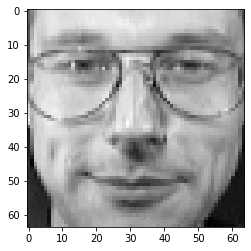

In [22]:
# plot a image
plt.imshow(X_train[1].reshape(64,64),cmap='gray')

# ANN Model

In [23]:
model2=Sequential()

model2.add(Dense(90,activation='relu'))# input neurons
model2.add(Dropout(0.5))

#model2.add(Dense(2048,activation='relu'))# input neurons
#model2.add(Dropout(0.5))

#model2.add(Dense(1024,activation='relu'))# input neurons
#model2.add(Dropout(0.5))# dropout to handle overfitt

model2.add(Dense(1024,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(40,activation='softmax'))

In [24]:
# compile the model using loss fnction, categorical cross entropy, Adam optimizer and accuracy metric
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
# fit the model with train data
model2.fit(X_train_pca,y_train,batch_size=12,epochs=10,verbose=1)

Epoch 1/10
280/280 [==============================] - 0s 628us/step - loss: 3.8350 - accuracy: 0.0500
Epoch 2/10
280/280 [==============================] - 0s 159us/step - loss: 3.2223 - accuracy: 0.2179
Epoch 3/10
280/280 [==============================] - 0s 141us/step - loss: 2.8301 - accuracy: 0.3429
Epoch 4/10
280/280 [==============================] - 0s 138us/step - loss: 2.3432 - accuracy: 0.4750
Epoch 5/10
280/280 [==============================] - 0s 135us/step - loss: 1.9139 - accuracy: 0.5821
Epoch 6/10
280/280 [==============================] - 0s 134us/step - loss: 1.4932 - accuracy: 0.7036
Epoch 7/10
280/280 [==============================] - 0s 137us/step - loss: 1.1760 - accuracy: 0.7857
Epoch 8/10
280/280 [==============================] - 0s 136us/step - loss: 1.0375 - accuracy: 0.7714
Epoch 9/10
280/280 [==============================] - 0s 133us/step - loss: 0.8380 - accuracy: 0.8000
Epoch 10/10
280/280 [==============================] - 0s 135us/step - loss: 0.727

In [26]:
# model evaluation score[loss , accuracy]
model2.evaluate(X_test_pca,y_test, verbose=0)

[0.7185862342516581, 0.8916666507720947]

# CNN Model

In [27]:
X_train=X_train.reshape(X_train.shape[0],1,64,64)
X_te=X_test.reshape(X_test.shape[0],1,64,64)

In [31]:

# define the model architecture
model=Sequential()
      ############################Convolution network##################################
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(1,64,64),data_format='channels_first'))# convolution layer
      
model.add(Convolution2D(32,(3,3),activation='relu'))#convolutionlayer
model.add(MaxPooling2D(pool_size=(2,2)))# pooling layer
model.add(Dropout(0.2))#dropot to handle overfitting


model.add(Flatten())# image flattern to row matrix


      ############################Feedforward network################################

#model.add(Dense(1024,activation='relu'))# input neurons
#model.add(Dropout(0.5))# dropout to handle overfitting

model.add(Dense(400,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(40,activation='softmax'))
  


AttributeError: module 'tensorflow._api.v2.config' has no attribute 'experimental_list_devices'

In [ ]:
# compile the model using loss fnction, categorical cross entropy, Adam optimizer and accuracy metric
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# fit the model with train data
model.fit(X_train,y_train,batch_size=12,epochs=10,verbose=1)

In [ ]:
# model evaluation score[loss , accuracy]
model.evaluate(X_te,y_test, verbose=0)